<h1> Covid-19 Cured or Death prediction </h1>


<p> In this study, I have built a Decision Tree to predict the Covid-19 patients results, which are labeled as DEATH or CURED.The attributes are zone,gender,age,result,Sample_Result etc

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3>Loading the data from csv file</h3>

In [2]:

df = pd.read_csv('smartcity_surat_covid_data.csv')
df.info()
display(df.head())
print('Dimensions of data: ', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sr_No          3592 non-null   int64  
 1   City           3592 non-null   object 
 2   Zone           3583 non-null   object 
 3   Age            3592 non-null   int64  
 4   Gender         3592 non-null   object 
 5   Latitude       3592 non-null   float64
 6   Longitude      3592 non-null   float64
 7   Result         3592 non-null   object 
 8   Sample_Result  3592 non-null   object 
 9   ResultDate     3592 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 280.8+ KB


,Sr_No,City,Zone,Age,Gender,Latitude,Longitude,Result,Sample_Result,ResultDate
0,1,Surat,South West Zone,21,F,21.169700,72.793300,Cured/Discharged,Positive,19/03/2020
1,2,Surat,Central Zone,67,M,21.186900,72.816000,Death,Positive,20/03/2020
2,3,Surat,East Zone - B,50,F,21.211302,72.868206,Cured/Discharged,Positive,10/06/2020
3,4,Surat,South Zone,26,M,21.139700,72.824100,Cured/Discharged,Positive,28/03/2020
4,5,Surat,West Zone,55,M,21.205612,72.804538,Cured/Discharged,Positive,11/06/2020


Dimensions of data:  (3592, 10)


<h4>Now, we preprocess the data
Do, city, zone, result, sample_result
First check if unique
count each value
drop less values</h4>

In [3]:
print((df['City'] == 'Out City').sum())
print(df['Sample_Result'].unique())

print(df['Result'].unique())

9
['Positive']
['Cured/Discharged' 'Death' 'Active']


In [4]:
# Removing City and Sample_Result which have same data all over the column
df.drop(['City', 'Sample_Result'], axis='columns', inplace=True)
# Removing rows which have 'Active' values in Result column
df.drop(df[df['Result']=='Active'].index, inplace=True)

In [5]:
category = df.select_dtypes(include=['object'])
display(category.head())

,Zone,Gender,Result,ResultDate
0,South West Zone,F,Cured/Discharged,19/03/2020
1,Central Zone,M,Death,20/03/2020
2,East Zone - B,F,Cured/Discharged,10/06/2020
3,South Zone,M,Cured/Discharged,28/03/2020
4,West Zone,M,Cured/Discharged,11/06/2020


Now, as we can see that zone, gender, result and result date are categorical variables. So, we'll
encode them using Label encoding technique

In [6]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
category = category.apply(le.fit_transform)
display(category.head())

,Zone,Gender,Result,ResultDate
0,5,0,0,63
1,0,1,1,67
2,2,0,0,36
3,6,1,0,97
4,7,1,0,39


Now, we'll replace the categorical data with encoded data

In [7]:
df = df.drop(category.columns, axis='columns')
df = pd.concat([df, category], axis='columns')
df.head()

,Sr_No,Age,Latitude,Longitude,Zone,Gender,Result,ResultDate
0,1,21,21.169700,72.793300,5,0,0,63
1,2,67,21.186900,72.816000,0,1,1,67
2,3,50,21.211302,72.868206,2,0,0,36
3,4,26,21.139700,72.824100,6,1,0,97
4,5,55,21.205612,72.804538,7,1,0,39


In [8]:
# convert target variable Result to categorical
df['Result'] = df['Result'].astype('category')

In [9]:
X = df.drop('Result', axis='columns')
Y = df['Result']

In [10]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=99)
x_train.head()

,Sr_No,Age,Latitude,Longitude,Zone,Gender,ResultDate
2044,2045,45,21.113245,72.770479,5,1,18
167,168,33,21.212400,72.782100,7,1,64
2533,2534,72,21.227844,72.831054,3,0,49
1376,1377,58,21.160445,72.866966,4,1,91
296,297,28,21.153900,72.828300,6,0,68


In [11]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_default = dt_default.predict(x_test)

print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1146
           1       0.97      0.27      0.43       106

    accuracy                           0.94      1252
   macro avg       0.95      0.64      0.70      1252
weighted avg       0.94      0.94      0.92      1252



In [13]:
display(confusion_matrix(y_test, y_pred_default))
display(accuracy_score(y_test, y_pred_default))

array([[1145,    1],
       [  77,   29]], dtype=int64)

0.9376996805111821

In [14]:
print('Predicted Cured accuracy: ', 1144/(2+1144)*100)
print('Predicted Death accuracy: ',29/(29+77)*100)

Predicted Cured accuracy:  99.82547993019197
Predicted Death accuracy:  27.358490566037734


Tuning the hyperparameters like max_depth, max_leaf_nodes, min_samples_split

In [15]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [16]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()
# print(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003784,0.000748,0.001795,0.000399,1,{'max_depth': 1},0.937634,0.941935,0.956989,0.950538,...,0.947527,0.006882,1,0.950000,0.948925,0.945161,0.946774,0.946774,0.947527,0.001720
1,0.004588,0.000489,0.001796,0.000399,2,{'max_depth': 2},0.937634,0.941935,0.956989,0.950538,...,0.947527,0.006882,1,0.950000,0.948925,0.945161,0.946774,0.946774,0.947527,0.001720
2,0.004139,0.000307,0.001795,0.000399,3,{'max_depth': 3},0.937634,0.939785,0.956989,0.950538,...,0.946667,0.007120,3,0.950000,0.950000,0.945161,0.946774,0.947849,0.947957,0.001875
3,0.005185,0.000399,0.001799,0.000401,4,{'max_depth': 4},0.937634,0.939785,0.954839,0.950538,...,0.946237,0.006523,4,0.950538,0.950000,0.947312,0.947312,0.947849,0.948602,0.001385
4,0.005784,0.000746,0.001706,0.000394,5,{'max_depth': 5},0.924731,0.939785,0.950538,0.944086,...,0.941505,0.009164,5,0.954301,0.951075,0.948925,0.949462,0.949462,0.950645,0.001965


Now let's visualize how train and test score changes with max_depth.

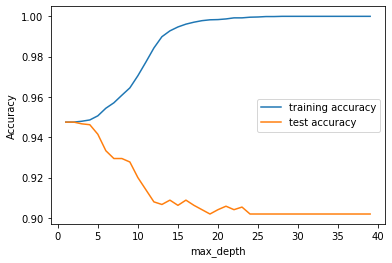

In [17]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [19]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007779,0.000747,0.001795,3.984453e-04,5,{'min_samples_leaf': 5},0.888172,0.922581,0.922581,0.929032,...,0.917849,0.015048,10,0.961828,0.961290,0.955376,0.961290,0.957527,0.959462,0.002558
1,0.006183,0.000399,0.002200,3.980836e-04,25,{'min_samples_leaf': 25},0.937634,0.941935,0.956989,0.950538,...,0.947527,0.006882,1,0.950000,0.948925,0.945161,0.946774,0.946774,0.947527,0.001720
2,0.005784,0.000398,0.001995,5.642013e-07,45,{'min_samples_leaf': 45},0.935484,0.939785,0.952688,0.948387,...,0.944946,0.006321,2,0.948925,0.946774,0.939247,0.942473,0.942473,0.943978,0.003441
3,0.004989,0.000005,0.001394,4.908170e-04,65,{'min_samples_leaf': 65},0.926882,0.929032,0.946237,0.931183,...,0.933333,0.006801,3,0.939247,0.936022,0.930645,0.933871,0.933333,0.934624,0.002877
4,0.005005,0.000601,0.001596,4.887153e-04,85,{'min_samples_leaf': 85},0.922581,0.922581,0.926882,0.926882,...,0.925161,0.002107,9,0.931720,0.927419,0.926882,0.926882,0.926882,0.927957,0.001893


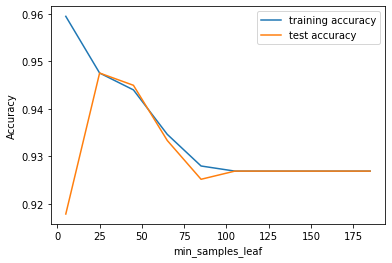

In [20]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [21]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [22]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008375,0.001015,0.002001,0.000640,5,{'min_samples_split': 5},0.877419,0.918280,0.905376,0.920430,...,0.908817,0.016802,10,0.987634,0.984409,0.983333,0.989785,0.987634,0.986559,0.002356
1,0.006972,0.000011,0.001396,0.000489,25,{'min_samples_split': 25},0.898925,0.924731,0.918280,0.911828,...,0.916989,0.011100,9,0.966129,0.963441,0.961290,0.961290,0.959677,0.962366,0.002230
2,0.006783,0.001162,0.001799,0.000402,45,{'min_samples_split': 45},0.935484,0.933333,0.933333,0.937634,...,0.935914,0.002508,8,0.953226,0.958065,0.954301,0.954839,0.954301,0.954946,0.001645
3,0.007776,0.000397,0.002200,0.000397,65,{'min_samples_split': 65},0.935484,0.935484,0.941935,0.937634,...,0.939355,0.004170,7,0.953226,0.954839,0.951613,0.952688,0.952688,0.953011,0.001054
4,0.007579,0.000489,0.001610,0.000502,85,{'min_samples_split': 85},0.935484,0.937634,0.946237,0.939785,...,0.941075,0.004428,6,0.952151,0.953763,0.949462,0.952688,0.952151,0.952043,0.001418


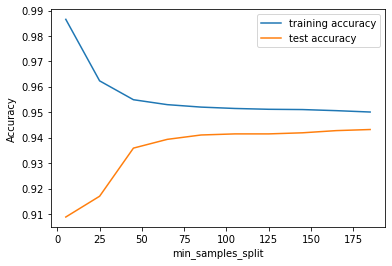

In [23]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(20, 75, 5),
    'min_samples_split': range(25, 50, 5),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(20, 75, 5),
                         'min_samples_split': range(25, 50, 5)},
             return_train_score=True, verbose=1)

In [25]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007380,0.000799,0.001795,0.000746,entropy,5,20,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.937634,...,0.947527,0.006882,1,0.950000,0.948925,0.945161,0.946774,0.946774,0.947527,0.001720
1,0.017551,0.020660,0.001994,0.000628,entropy,5,20,30,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.937634,...,0.947527,0.006882,1,0.950000,0.948925,0.945161,0.946774,0.946774,0.947527,0.001720
2,0.006677,0.000753,0.001702,0.000748,entropy,5,20,35,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.937634,...,0.947527,0.006882,1,0.950000,0.948925,0.945161,0.946774,0.946774,0.947527,0.001720
3,0.006183,0.000398,0.001199,0.000399,entropy,5,20,40,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.937634,...,0.947527,0.006882,1,0.950000,0.948925,0.945161,0.946774,0.946774,0.947527,0.001720
4,0.005778,0.000396,0.001596,0.000489,entropy,5,20,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.937634,...,0.947527,0.006882,1,0.950000,0.948925,0.945161,0.946774,0.946774,0.947527,0.001720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.005178,0.000392,0.001599,0.000484,gini,10,70,25,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.924731,...,0.930753,0.005991,191,0.936559,0.932258,0.928495,0.931183,0.931720,0.932043,0.002603
216,0.005180,0.000385,0.001794,0.000399,gini,10,70,30,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.924731,...,0.930753,0.005991,191,0.936559,0.932258,0.928495,0.931183,0.931720,0.932043,0.002603
217,0.005383,0.000490,0.001594,0.000488,gini,10,70,35,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.924731,...,0.930753,0.005991,191,0.936559,0.932258,0.928495,0.931183,0.931720,0.932043,0.002603
218,0.005690,0.000401,0.001697,0.000406,gini,10,70,40,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.924731,...,0.930753,0.005991,191,0.936559,0.932258,0.928495,0.931183,0.931720,0.932043,0.002603


In [26]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9475268817204301
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20,
                       min_samples_split=25)


In [27]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=35)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=35,
                       random_state=100)

In [28]:
# clf_gini.score(x_test, y_test)
y_pred = clf_gini.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1146
           1       0.97      0.30      0.46       106

    accuracy                           0.94      1252
   macro avg       0.95      0.65      0.71      1252
weighted avg       0.94      0.94      0.93      1252



In [29]:
print(confusion_matrix(y_test,y_pred))

[[1145    1]
 [  74   32]]


In [30]:
 print('Predicted  death accuracy after applying hyper parameters',32/(32+74))

Predicted  death accuracy after applying hyper parameters 0.3018867924528302
